<a href="https://colab.research.google.com/github/ishtarpcamo/ishtar/blob/main/%D8%B3%D8%B1%DB%8C%20%D8%A7%D9%88%D9%84%20%D8%AA%D9%85%D8%B1%DB%8C%D9%86%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

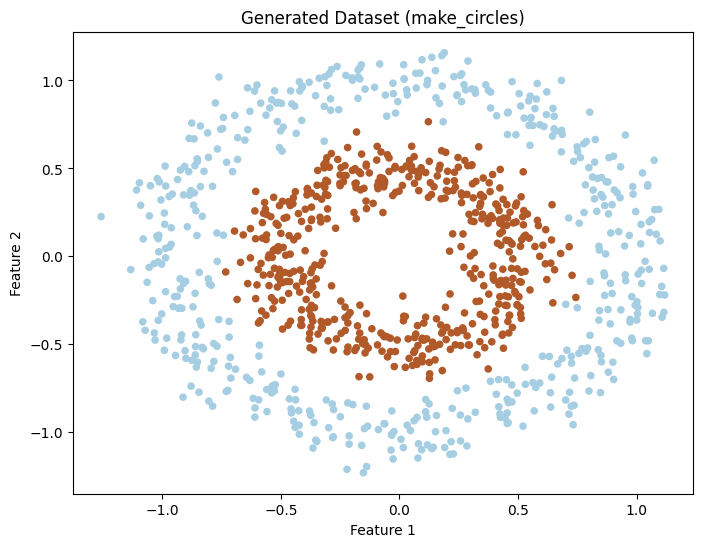

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset (make_circles)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# بارگذاری داده‌ها و تقسیم به دو قسمت آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [LogisticRegression(max_iter=1000), LinearSVC()]
model_names = ['Logistic Regression', 'Linear SVM']
accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"دقت مدل {name}: {accuracy}")

دقت مدل Logistic Regression: 0.46
دقت مدل Linear SVM: 0.46


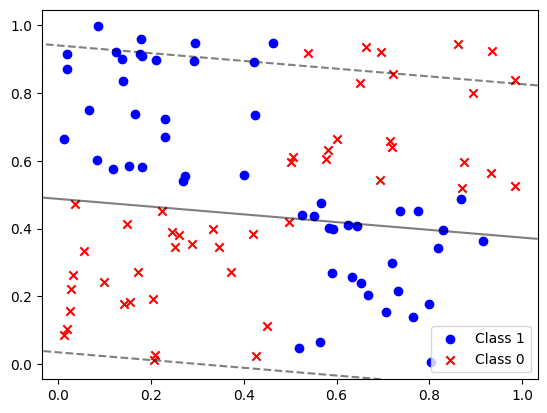

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# تولید داده‌های تصادفی برای آموزش مدل
X = np.random.rand(100, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5)

# آموزش مدل SVM
model = svm.SVC(kernel='linear')
model.fit(X, y)

# تصویرسازی مدل
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='o', label='Class 1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='x', label='Class 0')

# تصویرسازی مرز تصمیم
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.show()


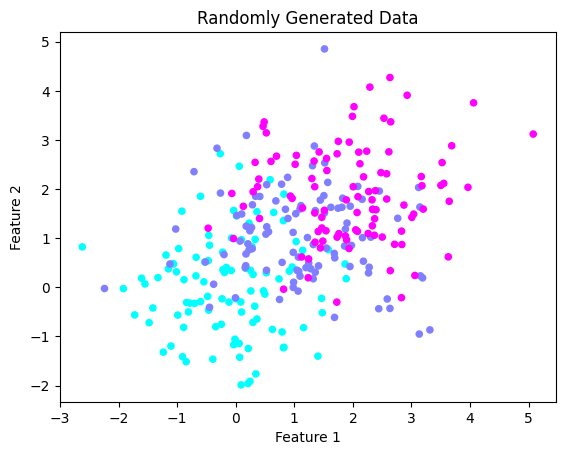

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تولید داده‌های تصادفی با تعداد کلاس و ویژگی‌های دلخواه
def generate_data(num_classes, num_features, num_samples, cluster_std, random_state):
    np.random.seed(random_state)
    X = np.zeros((num_samples * num_classes, num_features))
    y = np.zeros(num_samples * num_classes)

    for i in range(num_classes):
        X[i * num_samples:(i + 1) * num_samples, :] = np.random.normal(i, cluster_std, (num_samples, num_features))
        y[i * num_samples:(i + 1) * num_samples] = i

    return X, y

X, y = generate_data(num_classes=3, num_features=2, num_samples=100, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool, s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Data')
plt.show()
